In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
release_dates = pd.read_csv('data/release_dates.csv',
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

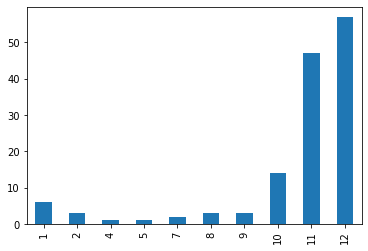

In [6]:
r = release_dates
r= r[r.title.str.contains('Christmas')]
r= r[r.country == 'USA']
r.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

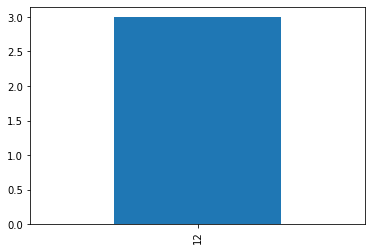

In [7]:
r = release_dates
r= r[r.title.str.startswith('The Hobbit')]
r= r[r.country == 'USA']
r.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

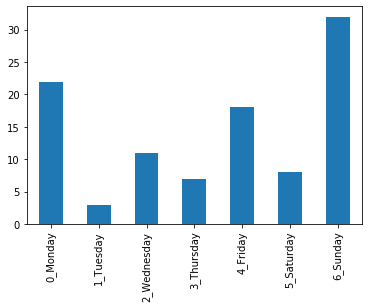

In [8]:
r = release_dates
r = r[r.title.str.contains('Romance')]
r = r[r.country == 'USA']
r = r.date.apply(lambda x: '{}_{}'.format(x.dayofweek, x.day_name()))
r.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

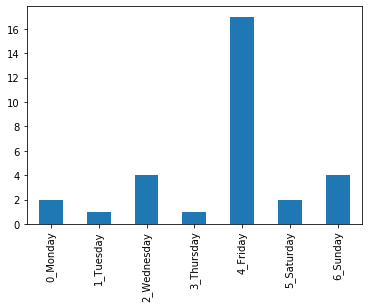

In [9]:
r = release_dates
r = r[r.title.str.contains('Action')]
r = r[r.country == 'USA']
r = r.date.apply(lambda x: '{}_{}'.format(x.dayofweek, x.day_name()))
r.value_counts().sort_index().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [10]:
cast_rd = cast.merge(release_dates)

In [14]:
c = cast_rd
c = c[(c.year // 10 * 10 == 1990)]
c = c[c.name == 'Judi Dench']
c = c[c.country == 'USA']
c.date.sort_values()

15289686   1995-11-17
15707532   1996-03-22
544790     1996-12-25
18468523   1997-10-03
8020093    1997-12-19
4998519    1999-01-08
1556151    1999-05-14
7094664    1999-11-19
Name: date, dtype: datetime64[ns]

### In which months do films with Judi Dench tend to be released in the USA?

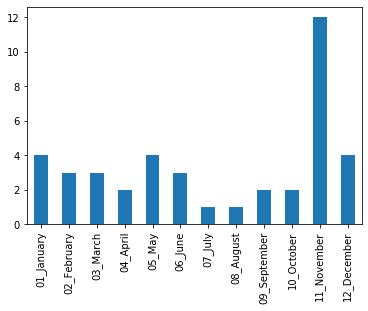

In [26]:
c = cast_rd
c = c[c.name == 'Judi Dench']
c = c[c.country == 'USA']
c = c.date.apply(lambda x: '{}_{}'.format(str(x.month).zfill(2), x.month_name()))
c.value_counts().sort_index().plot(kind = 'bar')

### In which months do films with Tom Cruise tend to be released in the USA?

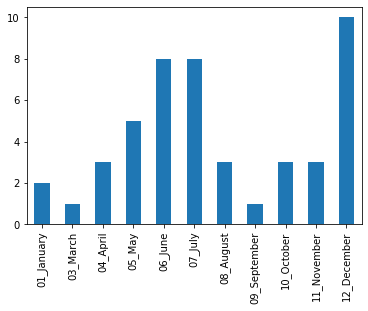

In [27]:
c = cast_rd
c = c[c.name == 'Tom Cruise']
c = c[c.country == 'USA']
c = c.date.apply(lambda x: '{}_{}'.format(str(x.month).zfill(2), x.month_name()))
c.value_counts().sort_index().plot(kind = 'bar')